In [10]:
import numpy as np
import pandas as pd
import time as time
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1. To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this. 

In [11]:
# Create 5 uniformly distributed integers with size from 512, 1024, 2048, 4096 to 8192
# Create an array containing the size of these 5 random number arrays
np.random.seed(20200110)
df1 = np.random.randint(low = 1, high = 10000, size = 512)
df2 = np.random.randint(low = 1, high = 10000, size = 1024)
df3 = np.random.randint(low = 1, high = 10000, size = 2048)
df4 = np.random.randint(low = 1, high = 10000, size = 4096)
df5 = np.random.randint(low = 1, high = 10000, size = 8192)
len_array = np.array([len(df1), len(df2),len(df3), len(df4),len(df5)])
len_array

array([ 512, 1024, 2048, 4096, 8192])

### 2. Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.

In [12]:
# Sorting these 5 arrays and recording times for sorting in miliseconds
# putting recorded sorting time into an array
sort_time = np.array([])
for j in [df1, df2, df3, df4, df5]:
    start = time.time()
    j.sort()
    end= time.time()
    sorting = round((end - start)*1000, 5)
    sort_time = np.append(sort_time, sorting)
sort_time

array([0.     , 0.     , 0.99993, 0.     , 0.     ])

### 3. Execute the base search algorithm (binary search) (from the text and github code) for each of array, noting the execution time for each array.  With each execution use the maximum value of the random number array as the number for which you are searching.

In [13]:
# Binary search def
def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
        # Found the item.
        if guess == item:
            return mid
        # The guess was too high.
        if guess > item:
            high = mid - 1
        # The guess was too low.
        else:
            low = mid + 1
  # Item doesn't exist
        return None

In [14]:
# Measure and record the time for running binary search on these 5 arrays
# put results into an array
binary_time = np.array([])
for j in [df1, df2, df3, df4, df5]:
    # binary search time
    start = time.time()
    binary_search(j, max(j))
    end   = time.time()
    binary = round((end-start)*1000, 5)
    binary_time = np.append(binary_time, binary)

binary_time

array([0.     , 0.     , 0.     , 1.00017, 0.99993])

### 4. Now we will compare this to a linear search.  Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:
### a. length of the random number array
### b. sort time
### c. linear search time for the sorted array
### d. binary search time for the sorted array
### e. binary search plus sort times

In [15]:
# Create a def for running linear research
# using linear research def to measure time on these 5 arrays 
# put results into an array

# linear search from pandas
def linear_search(list, item):
    for i in range(len(list)):
        if list[i] == item:
            return i

linear_time = np.array([])
for j in [df1, df2, df3, df4, df5]:
    # liear search time
    start = time.time()
    linear_search(j, max(j))
    end   = time.time()
    filename = round((end-start)*1000, 5)
    linear_time = np.append(linear_time, filename)

linear_time

array([0.     , 0.     , 1.00017, 0.99993, 3.00026])

In [16]:
# Create a pandas dataframe to put all four columns together. 
# Create fifth column for time of sort plus binary search
data = {'len_array': len_array, 'sort_time': sort_time, 'linear_time': linear_time, 'binary_time': binary_time}
df = pd.DataFrame(data)
df['sort_plus_binary'] = df['sort_time'] + df['binary_time']
df.head()

,len_array,sort_time,linear_time,binary_time,sort_plus_binary
0,512,0.00000,0.00000,0.00000,0.00000
1,1024,0.00000,0.00000,0.00000,0.00000
2,2048,0.99993,1.00017,0.00000,0.99993
3,4096,0.00000,0.99993,1.00017,1.00017
4,8192,0.00000,3.00026,0.99993,0.99993


### 5. Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for linear and binary search algorithms alone.  Discuss the results.

### Discussion: Running each time actually generate different time for binary and linear research. Hence the curve could look different if the run is repeated. But in general, you will see the needed time will increase on linear search as size of array increases. But for binary search, you will see some time increase but not as much as the time in linear search. Also the search time seems to be flattened when array size is between 4000-10000. Therefore my conclusion is linear search is more size dependent while binary search is much less array size dependent in our study. 

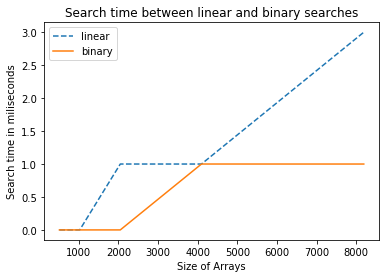

In [17]:
fig = plt.figure()
ax  = plt.axes()

# x axis is array size
x = df['len_array']
y1 = df['linear_time']
y2 = df['binary_time']
plt.plot(x, y1, linestyle ='dashed', label='linear');
plt.plot(x, y2, linestyle ='solid' , label='binary');
plt.title("Search time between linear and binary searches")
plt.xlabel("Size of Arrays")
plt.ylabel("Search time in miliseconds");
plt.legend()

### 6. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.

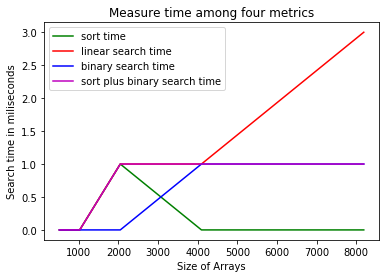

In [18]:
fig = plt.figure()
ax  = plt.axes()

# x axis is array size
x = df['len_array']
plt.plot(x, df['sort_time'],   'g', label='sort time');
plt.plot(x, df['linear_time'], 'r', label='linear search time');
plt.plot(x, df['binary_time'], 'b', label='binary search time');
plt.plot(x, df['sort_plus_binary'], 'm', label='sort plus binary search time');
plt.title("Measure time among four metrics")
plt.xlabel("Size of Arrays")
plt.ylabel("Search time in miliseconds");
plt.legend()

### Discussion: Sorting time is much less size dependent when number of value is below 4000. When size increase to 8192, you will clearly see the sorting time is longer than other arrays. 
### Linear search is believed to be size dependent because search algorithm will need to go through numbers one by one until the target number if found. Hence the larger the array is, the loner time the linear search will need. 
### Binary search show less size dependent when size is less than 4000. At the largest array which contains 8192 values, the time needed is longer than other arrays. 
### if combine sorting and binary search time together, the linear relationship of total time needed vs array size is more clear. since the testing array size is not evenly increased, most data points concentrates at early stage. the curve will be see no linearity when array size is small. as array size increases in a greater step (for example from 1024 t0 2048 and forward), the curve is going up and showing some linearity between array size and measurement.  